# Table of Contents
* [Introduction](#introduction)
    * [Project Description](#project_description)
    * [Data Preprocessing](#data_preprocessing)
        * [Loading Data](#loading_data)
        * [Preparing Data](#preparing_data)
    * [EDA](#eda)
        * [Games Release Per Year](#games_release_per_year)
        * [Games Sales Per Platform](#games_sales_per_platform)
        * [Distribution of Platform with Highest Sales Per Year](#distribution_of_platform_with_highest_sales_per_year)
        * [Platform from Hero to Zero](#platform_from_hero_to_zero)
        * [Global Sales Per Platform](#global_sales_per_platform)
    * [Features Engineering](#features_engineering)
        * [Effect of Reviews to Platform](#effect_of_reviews_to_platform)
        * [Effect of Ratings to Sales](#effect_of_ratings_to_sales)
        * [PS2 Sales and Ratings](#ps2_sales_and_ratings)
        * [Correlation of Total Sales to Scoring](#correlation_of_total_sales_to_scoring)
        * [Effect of Genre and Sales](#effect_of_genre_and_sales)
        * [Effect of Platform and Sales](#effect_of_platform_and_sales)
    * [Hypotheses Testing](#hypotheses_testing)
        * [3.1 Hypothesis 1: Average User ratings of XBox One and PC are the same.](#user_ratings_platform)
        * [3.2 Hypothesis 2: Average User ratings of Action and Sports Games are different.](#user_ratings_games)
    * [Overall Conclusion](#conclusion)

## Introduction

### Project description
You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as mso
from scipy import stats
import plotly
import plotly.express as px
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('games.csv')

## Data Preprocessing

In [3]:
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
print ("#"*40,"\nMissing values :\n\n", df.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing :\n\n", round(df.isna().sum() / df.isna().count() * 100, 2))
print ("#"*40,"\nUnique values :  \n\n", df.nunique())  
print ("#"*40,"\n","\n\n")

######################################## 
Missing values :

 Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64
######################################## 
Percent of missing :

 Name                0.01
Platform            0.00
Year_of_Release     1.61
Genre               0.01
NA_sales            0.00
EU_sales            0.00
JP_sales            0.00
Other_sales         0.00
Critic_Score       51.32
User_Score         40.09
Rating             40.48
dtype: float64
######################################## 
Unique values :  

 Name               11559
Platform              31
Year_of_Release       37
Genre                 12
NA_sales             402
EU_sales             307
JP_sales             244
Other_sales          155
Critic_Score          82
User_Score          

<Figure size 2000x1000 with 0 Axes>

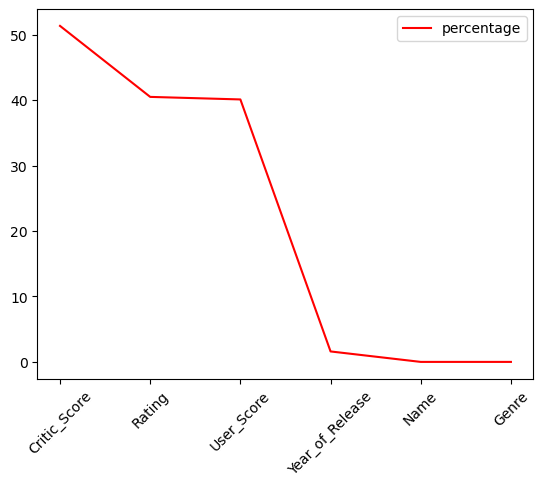

<AxesSubplot:>

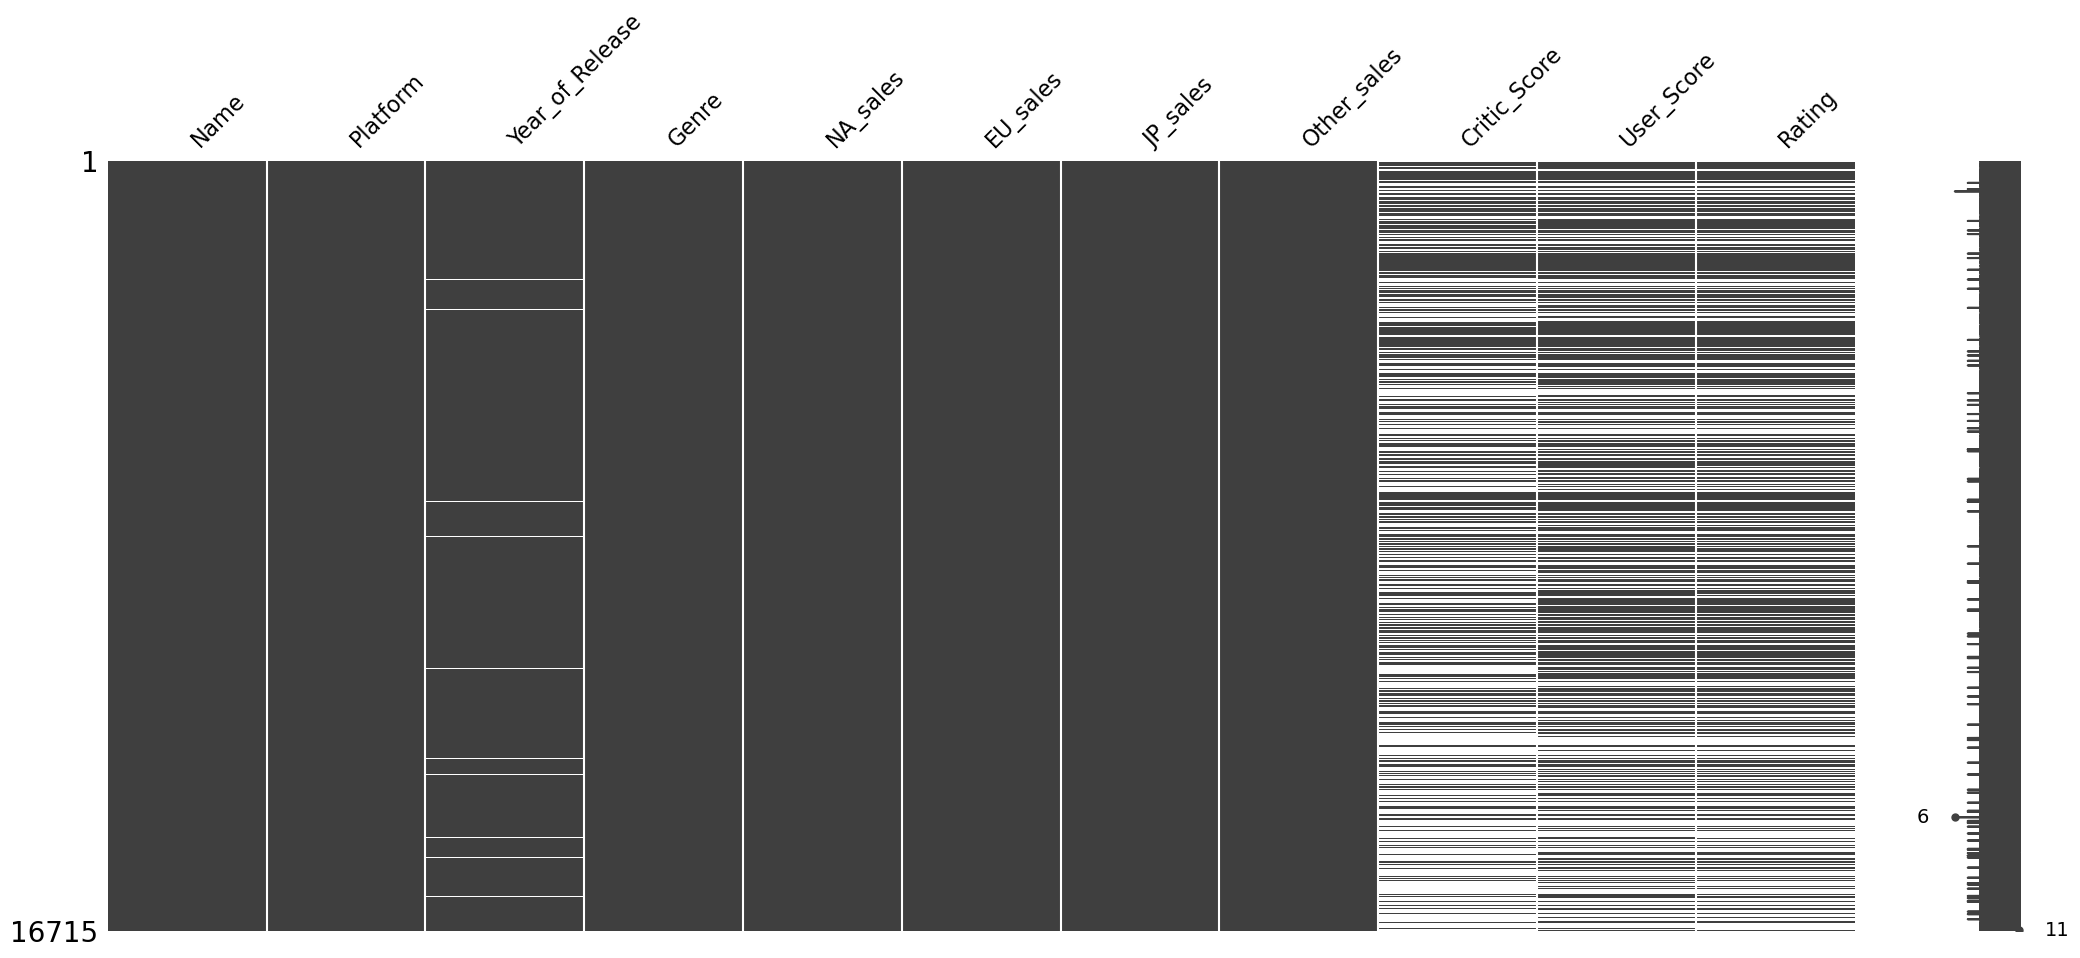

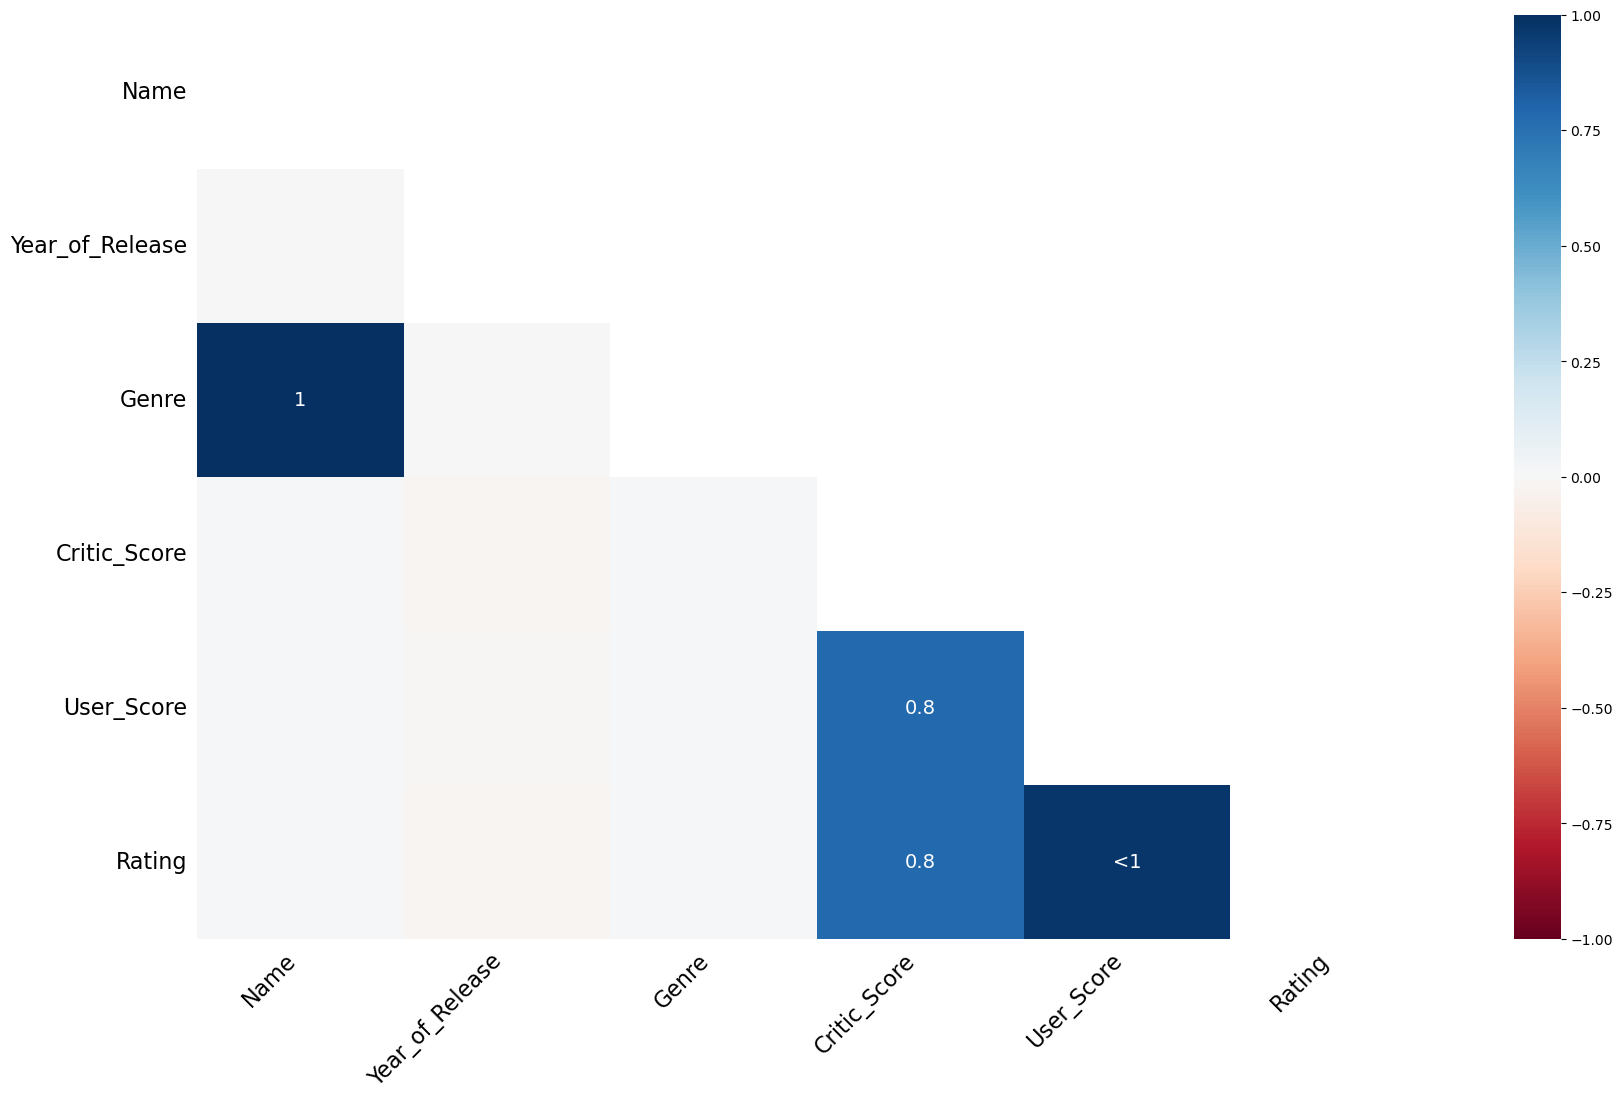

In [7]:
feature = []
percentage = []
for i in df.columns:
    miss_per = (df[i].isna().sum()/len(df[i]))*100
    if miss_per > 0:    
        feature.append(i)
        percentage.append(miss_per)
        
miss_df = pd.DataFrame(data=percentage, index=feature, columns=['percentage'])
plt.figure(figsize=(20,10))
ax = miss_df.sort_values(by='percentage', ascending=False).plot(color='red')
plt.xticks(rotation=45)
plt.show()
mso.matrix(df)
mso.heatmap(df)

In [8]:
#converting to lowercase
df.columns = df.columns.str.lower()

In [9]:
#converting data types
df.rename(columns = {'year_of_release':'year', 'na_sales':'NA', 'eu_sales':'EU', 'jp_sales':'JP', 'other_sales':'others'}, inplace=True)

In [10]:
df['user_score'] = df['user_score'].replace(['tbd'], 'NaN')

In [11]:
df['user_score'] = df['user_score'].astype(float, errors='ignore')

In [12]:
df.dtypes

name             object
platform         object
year            float64
genre            object
NA              float64
EU              float64
JP              float64
others          float64
critic_score    float64
user_score      float64
rating           object
dtype: object

In [13]:
df.describe()

,year,NA,EU,JP,others,critic_score,user_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [14]:
df.isnull().sum()

name               2
platform           0
year             269
genre              2
NA                 0
EU                 0
JP                 0
others             0
critic_score    8578
user_score      9125
rating          6766
dtype: int64

In [15]:
#df['year'] = df['year'].astype(int)

In [16]:
#checking if names or labels are correct
print ("#"*40,"\n","Name of Game : \n\n", df.name.unique())
print ("#"*40,"\n","Platform of Game : \n\n", df.platform.unique())
print ("#"*40,"\n","Genre of Game : \n\n", df.genre.unique())
print ("#"*40,"\n","Rating of Game : \n\n", df.rating.unique())

######################################## 
 Name of Game : 

 ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
######################################## 
 Platform of Game : 

 ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
######################################## 
 Genre of Game : 

 ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
######################################## 
 Rating of Game : 

 ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [17]:
#checking for duplicates
print(df.duplicated().sum())

0


In [18]:
df['total_sales']=df[['NA','EU','JP','others']].sum(axis=1)

* Observations:
* Minimal changes were done in processing the dataset. The missing values were looked at but not treated. Column names were transposed to small letters.
* The total sales of all regions was included as a new column. 

## EDA

### Games Released Per Year

In [19]:
df_year_release = df.groupby('year')['name'].value_counts()
df_year_release

year    name                                               
1980.0  Asteroids                                              1
        Boxing                                                 1
        Bridge                                                 1
        Checkers                                               1
        Defender                                               1
                                                              ..
2016.0  Yokai Sangokushi                                       1
        Yokai Watch 3                                          1
        Ys VIII: Lacrimosa of Dana                             1
        Yuusha Shisu.                                          1
        Zettai Kaikyuu Gakuen: Eden with Roses and Phantasm    1
Name: name, Length: 12195, dtype: int64

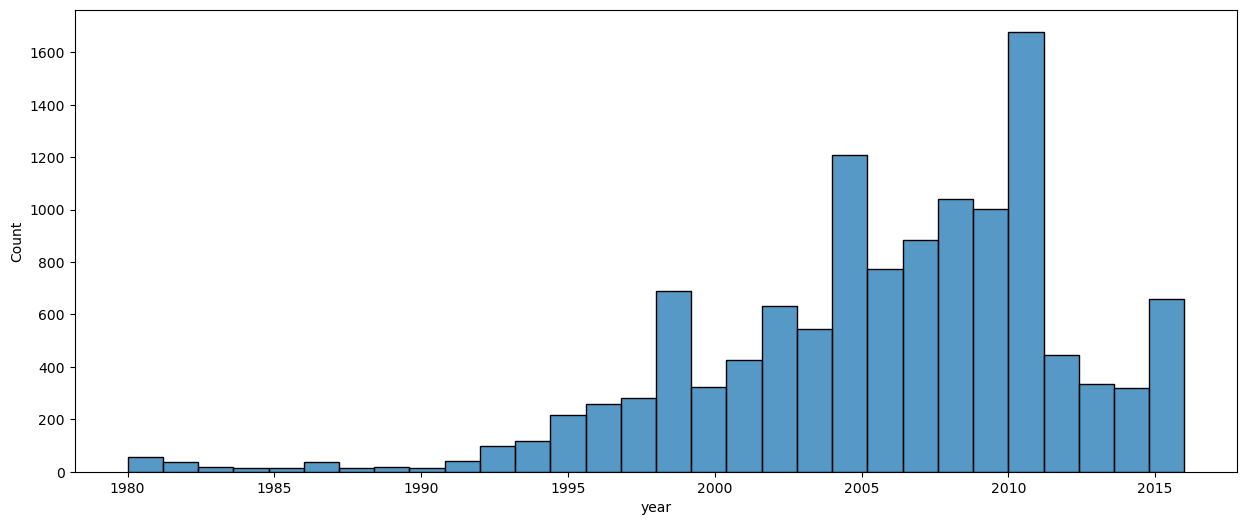

In [20]:
plt.figure(figsize=(15,6))
sns.histplot(data=df_year_release, x='year', bins=30)
plt.show()

* Observations:
* There were about 1600 games released in 2011 followed in 2004 with 1200 games. The distribution shows that from 2000 to 2016 with the exception in 1998, there were more games released than from 1980 to late 90s. 

### Sales Per Platform

In [21]:
df_platform_sales = df.groupby('platform')['total_sales'].sum().reset_index()
df_platform_sales.columns = ['platform', 'total_sales']
df_platform_sales

,platform,total_sales
0,2600,96.98
1,3DO,0.10
2,3DS,259.00
3,DC,15.95
4,DS,806.12
5,GB,255.46
6,GBA,317.85
7,GC,198.93
8,GEN,30.77
9,GG,0.04


In [22]:
df_platform_sales = df_platform_sales.sort_values(by=['total_sales'], ascending=False)

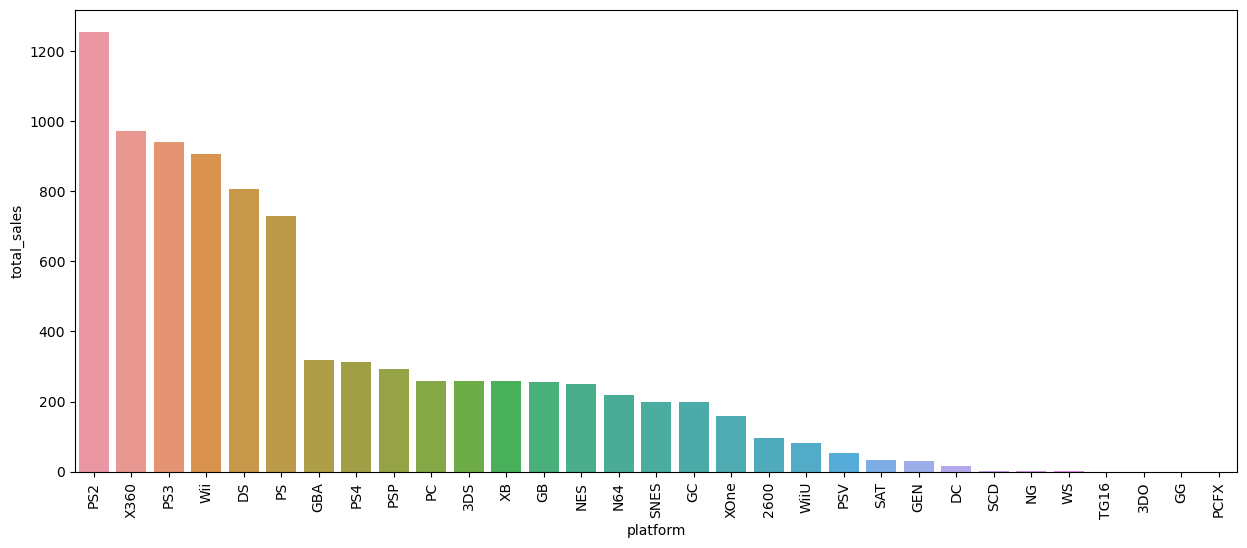

In [23]:
plt.figure(figsize=(15,6))
sns.barplot(data=df_platform_sales, x='platform', y='total_sales')
plt.xticks(rotation=90)
plt.show()

* Observations:
* Based on the plot showing the sales per platform, game titles for PS2 have the highest number of sales of USD 1256 million. All Playstation console games (PS, PS2, PS3, PS4) are among the top 10. Microsoft's XBox 360 console games are trailing behind and Nintentdo's Wii and DS.  

## Distribution of Platform with Highest Sales Per Year

In [24]:
df_year_platform = df.groupby(['year', 'platform']).agg({'NA': "sum", "EU":"sum", "JP":"sum", "others":"sum"})
df_year_platform

NA    EU    JP  others
year   platform                           
1980.0 2600      10.59  0.67  0.00    0.12
1981.0 2600      33.40  1.96  0.00    0.32
1982.0 2600      26.92  1.65  0.00    0.31
1983.0 2600       5.44  0.34  0.00    0.06
       NES        2.32  0.46  8.10    0.08
...                ...   ...   ...     ...
2016.0 PSV        0.15  0.39  3.56    0.15
       Wii        0.06  0.11  0.00    0.01
       WiiU       2.10  1.48  0.67    0.35
       X360       0.69  0.71  0.00    0.12
       XOne      14.27  9.63  0.01    2.24

[238 rows x 4 columns]

In [25]:
df_year_platform_sales = df_year_platform.sum(axis=1).reset_index()
df_year_platform_sales.columns = ['year', 'platform', 'total_sales']

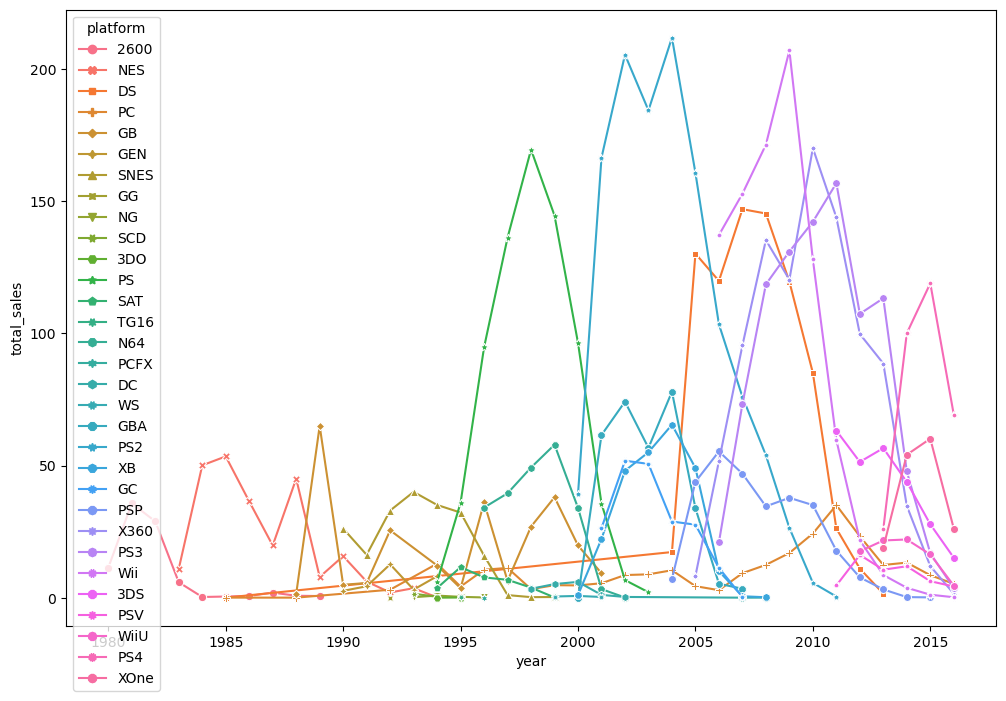

In [26]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_year_platform_sales, x='year', y='total_sales', hue='platform', style='platform', markers=True, dashes=False)
plt.show()

* Observations:
* Based on the plot showing the sales growth of games per platform from 1980 to 2015, PS, PS2 and Wii showed exponential sales in the span of roughly 5 years compared to the other platforms. 
* The plot also shows that there are more platforms achieving more sales from 2000 to 2016 than platforms released from 1980 to 2000. It's a difference of twenty years. 

### Game Sales for PS2 

In [27]:
df_year_platform_sales_ps2 = df_year_platform_sales.query('platform == "PS2"')

In [28]:
df_year_platform_sales_ps2.total_sales.sum()

1233.5600000000002

### Game Sales for X360

In [29]:
df_year_platform_sales_x360 = df_year_platform_sales.query('platform == "X360"')

In [30]:
df_year_platform_sales_x360.total_sales.sum()

961.24

### Game Sales for PS3

In [31]:
df_year_platform_sales_ps3 = df_year_platform_sales.query('platform == "PS3"')

In [32]:
df_year_platform_sales_ps3.total_sales.sum()

931.3400000000001

### Games Sales for Wii

In [33]:
df_year_platform_sales_wii = df_year_platform_sales.query('platform == "Wii"')

In [34]:
df_year_platform_sales_wii.total_sales.sum()

891.18

### Games Sales for DS

In [35]:
df_year_platform_sales_ds = df_year_platform_sales.query('platform == "DS"')

In [36]:
df_year_platform_sales_wii.total_sales.sum()

891.18

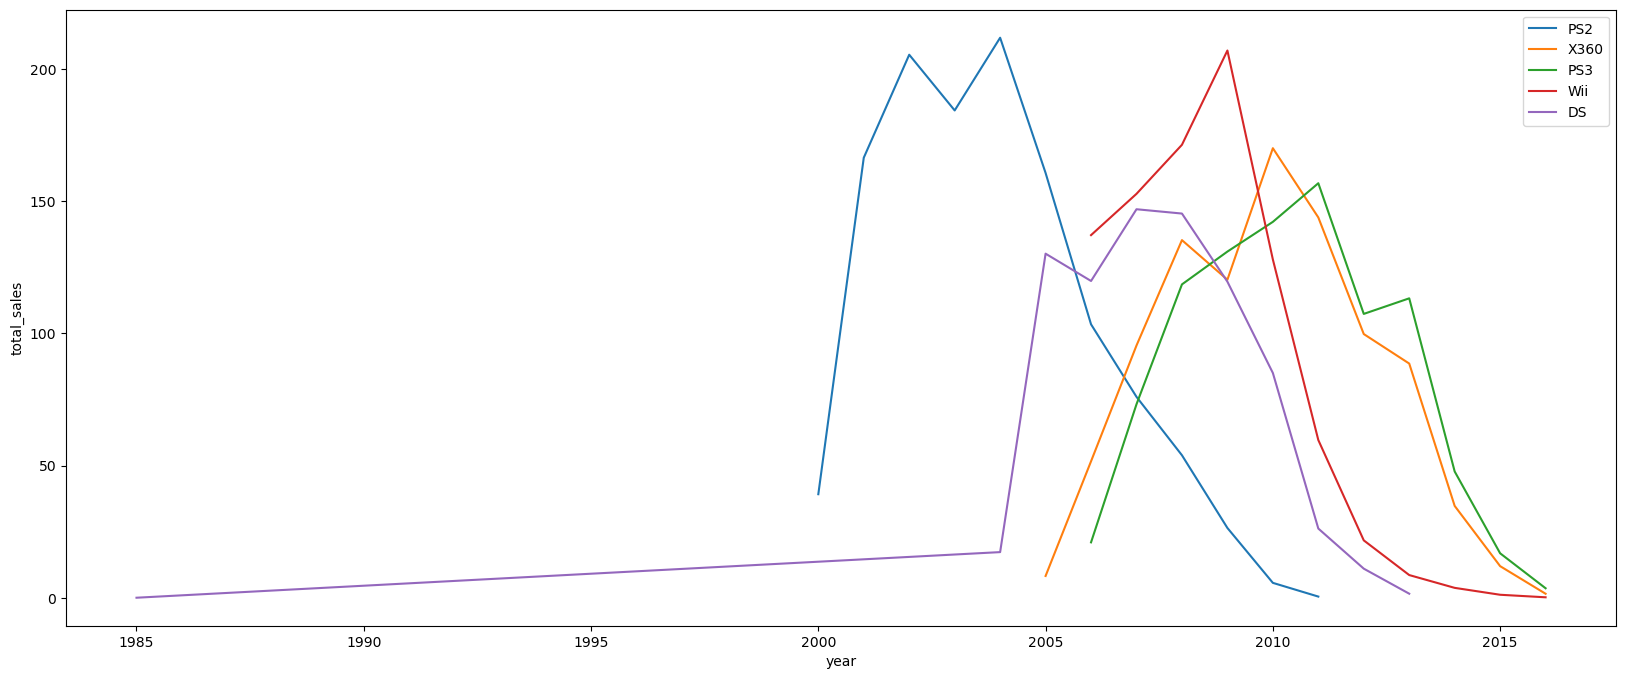

In [37]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df_year_platform_sales_ps2, x='year', y='total_sales')
sns.lineplot(data=df_year_platform_sales_x360, x='year', y='total_sales')
sns.lineplot(data=df_year_platform_sales_ps3, x='year', y='total_sales')
sns.lineplot(data=df_year_platform_sales_wii, x='year', y='total_sales')
sns.lineplot(data=df_year_platform_sales_ds, x='year', y='total_sales')
plt.legend(['PS2', 'X360', 'PS3', 'Wii', 'DS'])
plt.show()

### Forecasting Sales for 2017

In [38]:
df_forecast = df.groupby('year')['total_sales'].sum().reset_index()

In [39]:
df_forecast1 = df_forecast.append({'year':'2017.0', 'total_sales':'238.291'}, ignore_index=True)

In [40]:
df_good = df[df.year >= 2014]
df_good1 = df[df.year >= 2015]
df_good2 = df[df.year >= 2016]
df_forecast2 = df_forecast1[df_forecast1.year == 2017]

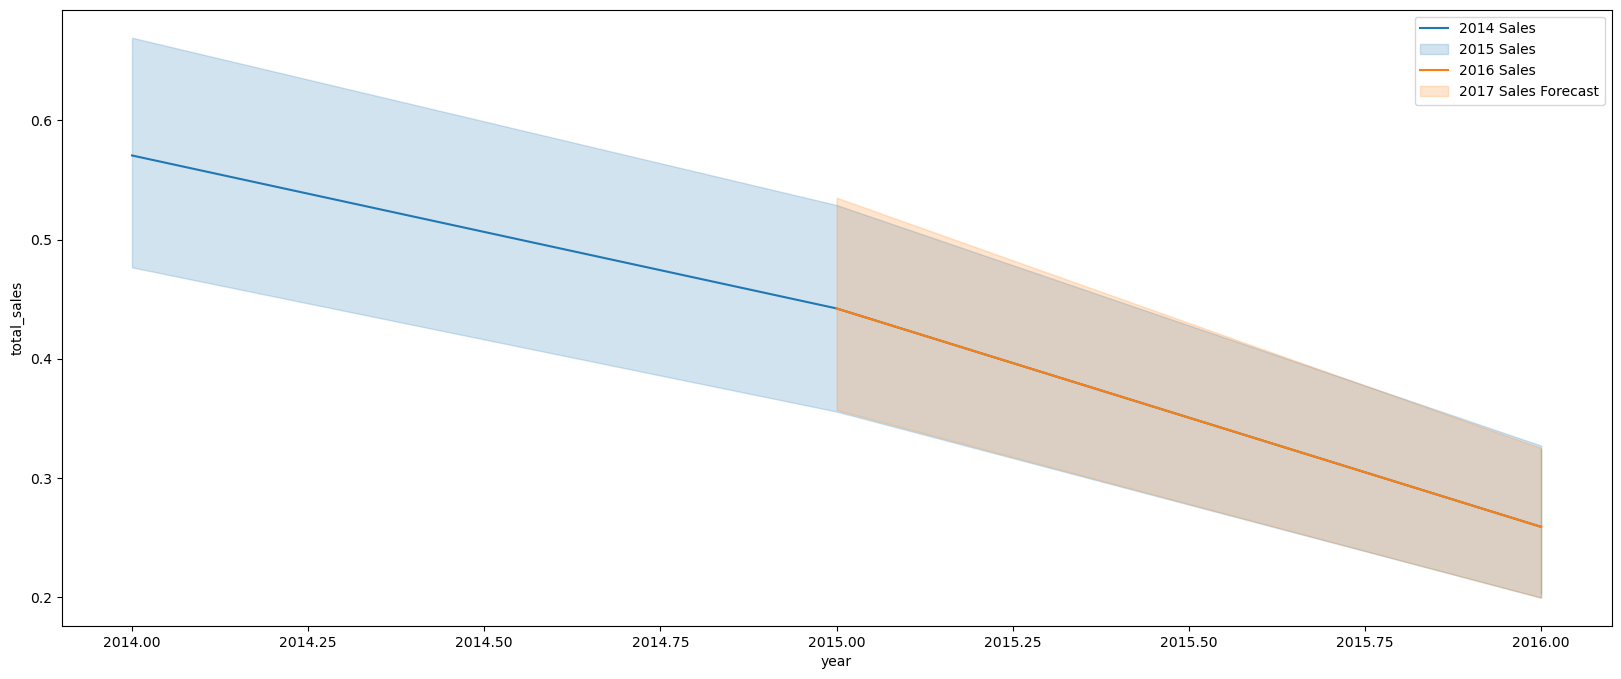

In [41]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df_good, x='year', y='total_sales')
sns.lineplot(data=df_good1, x='year', y='total_sales')
sns.lineplot(data=df_good2, x='year', y='total_sales')
sns.lineplot(data=df_forecast2, x='year', y='total_sales')
plt.legend(['2014 Sales', '2015 Sales', '2016 Sales', '2017 Sales Forecast'])
plt.show()

* Observations:
* Based on the plot showing sales from 2014 to 2016, it shows a decline including the sales for 2017. Therefore, there are less sales for 2017.   

## Platforms from Hero to Zero

In [42]:
df_zero = df_year_platform_sales.query('total_sales >= 100')

In [43]:
df_zero_ps4 = df_year_platform_sales.query('platform == "PS4"')
df_zero_ps3 = df_year_platform_sales.query('platform == "PS3"')
df_zero_ps2 = df_year_platform_sales.query('platform == "PS2"')
df_zero_ps = df_year_platform_sales.query('platform == "PS"')

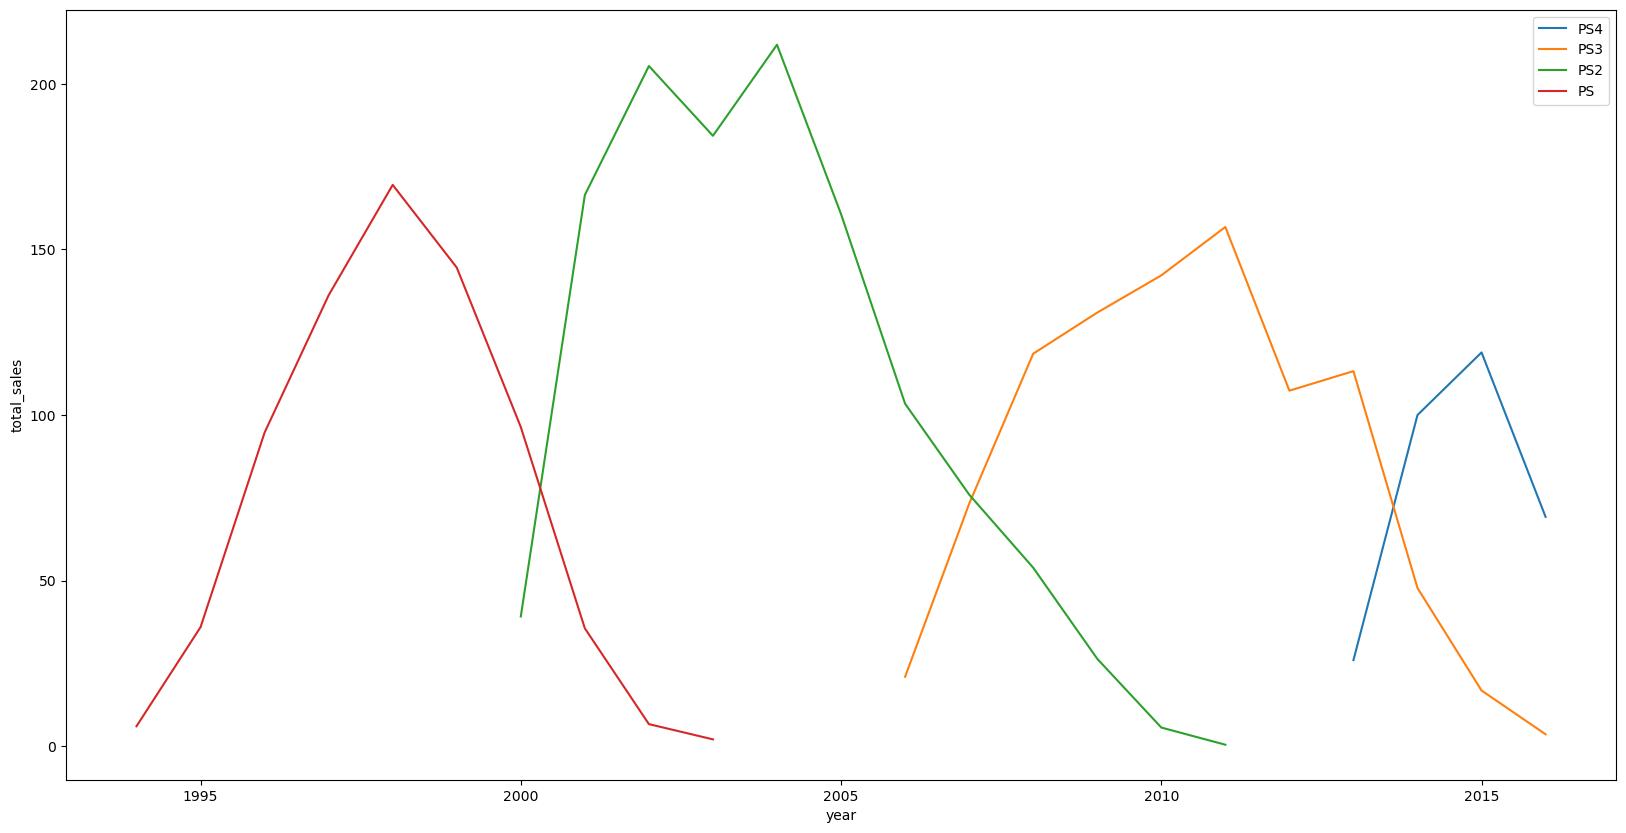

In [44]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_zero_ps4, x='year', y='total_sales')
sns.lineplot(data=df_zero_ps3, x='year', y='total_sales')
sns.lineplot(data=df_zero_ps2, x='year', y='total_sales')
sns.lineplot(data=df_zero_ps, x='year', y='total_sales')
plt.legend(['PS4', 'PS3', 'PS2', 'PS'])
plt.show()

* Observations:
* The plot above combines sales growth of games for Playstation consoles (PS, PS2, PS3 and PS4) from 1994 to 2016. PS2 achieved the highest sales compared to the other consoles. PS2 even overtook its predecessor PS. However, PS3 which should be a better version of PS2, failed to overtook PS2. PS4 suffered the same fate in that it didn't reach the same sales growth even at the beginning.  

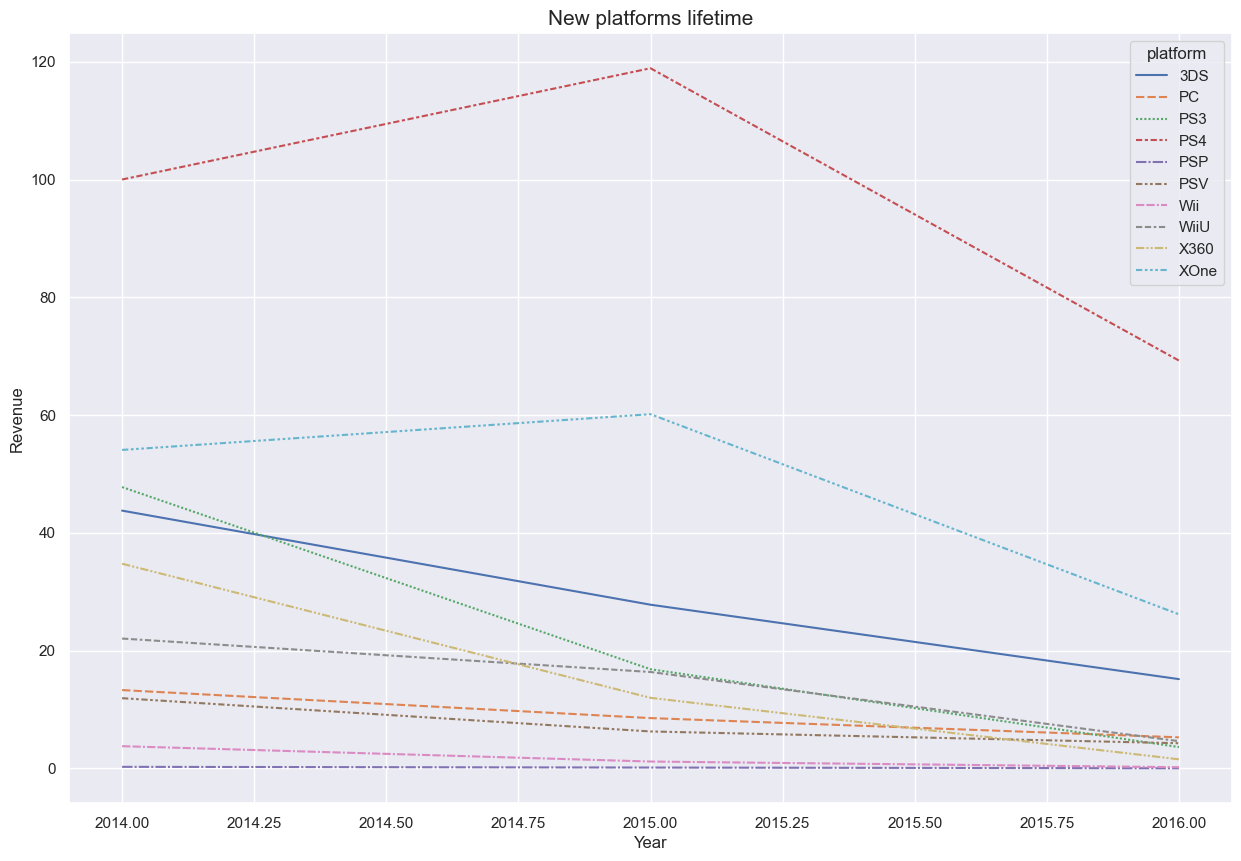

In [45]:
df_lifetime_new=pd.pivot_table(df_good,index='year',columns='platform',values='total_sales', aggfunc='sum').fillna(0)
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(data=df_lifetime_new)
plt.ylabel('Revenue')
plt.xlabel('Year')
plt.title('New platforms lifetime', size=15);

* Observations:
* The plot above shows how game sales per platfrom fared from 2014 to 2016. PS4 is higher in sales volume than the other platforms. 

### Years with Fantastic Sales 

In [46]:
df_good4 = df[(df.year >= 1996) & (df.year <= 2000)]
df_good5 = df[(df.year >= 2000) & (df.year <= 2004)]
df_good6 = df[(df.year >= 2004) & (df.year <= 2008)]

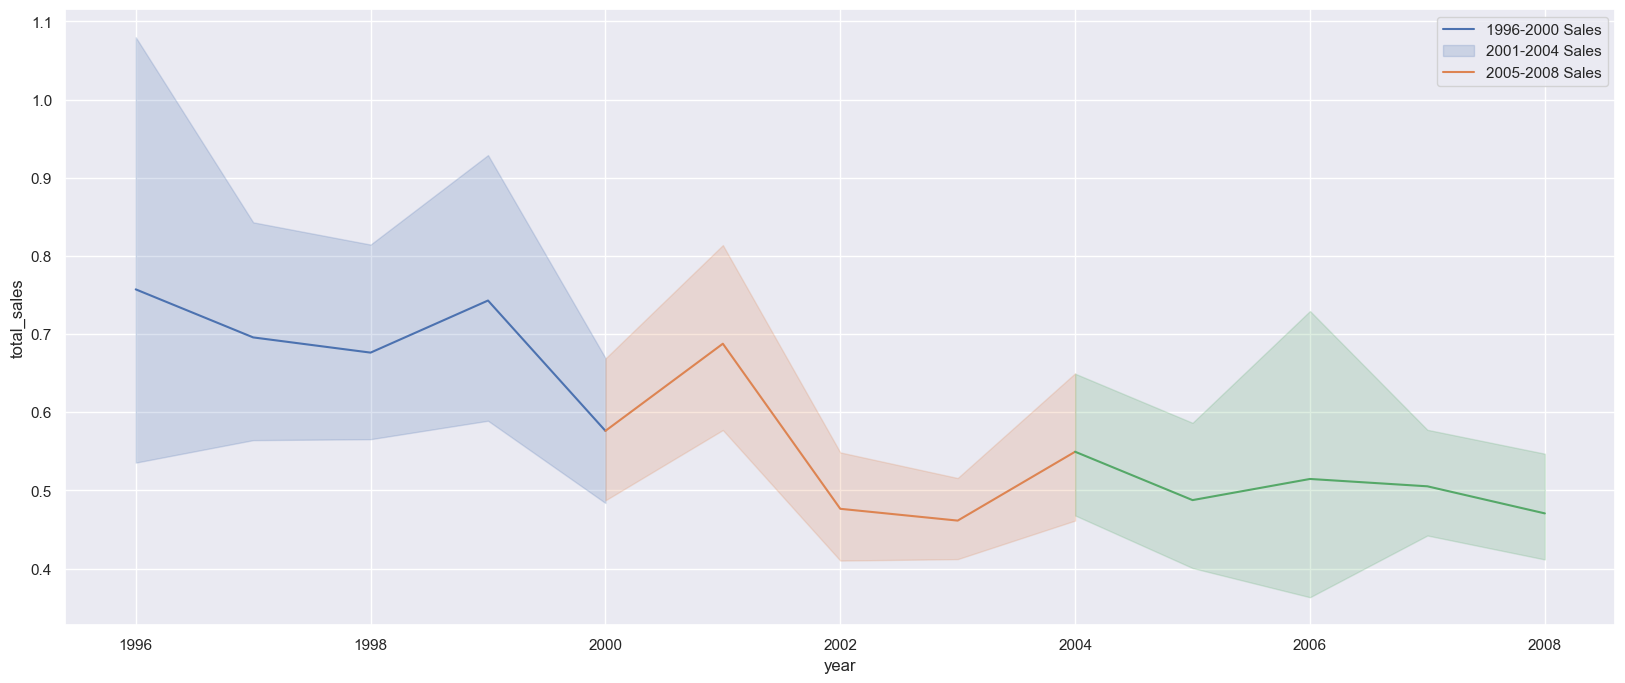

In [47]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df_good4, x='year', y='total_sales')
sns.lineplot(data=df_good5, x='year', y='total_sales')
sns.lineplot(data=df_good6, x='year', y='total_sales')
plt.legend(['1996-2000 Sales', '2001-2004 Sales', '2005-2008 Sales'])
plt.show()

* Observations:
* Based on the plot showing the sales growth fom 1996 to 2008, it shows when the highest sales were achieved.

### Game Sales in 2014

In [48]:
df_good_sorted = df_good.sort_values(by=['total_sales'], ascending=False)
df_good_sorted

,name,platform,year,genre,NA,EU,JP,others,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16264,Worms: WMD,XOne,2016.0,Action,0.01,0.00,0.00,0.00,75.0,8.1,E10+,0.01
16267,The Book of Unwritten Tales 2,WiiU,2016.0,Adventure,0.00,0.01,0.00,0.00,NaN,NaN,T,0.01
16270,Hyakka Yakou,PSV,2015.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16276,Sangoku Koi Senki: Omoide Gaeshi - CS Edition,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


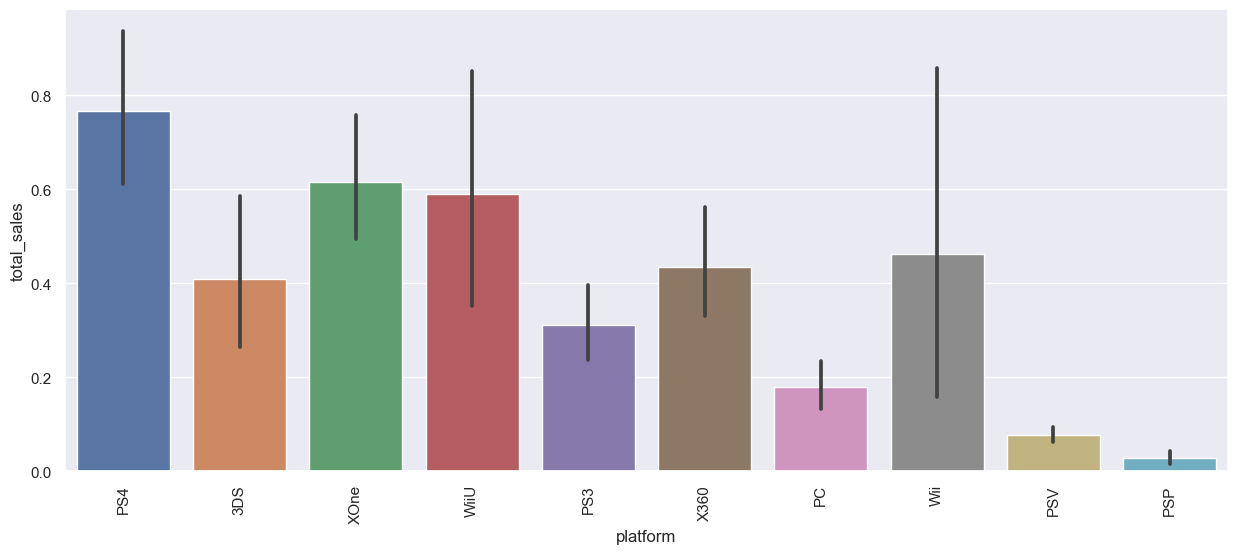

In [49]:
plt.figure(figsize=(15,6))
sns.barplot(data=df_good_sorted, x='platform', y='total_sales')
plt.xticks(rotation=90)
plt.show()

* Observations:
* Based on the plot above, it shows the game sales per platform in 2014. PS4 has the highest sales volume compared to the rest. 

## Global Sales Per Platform

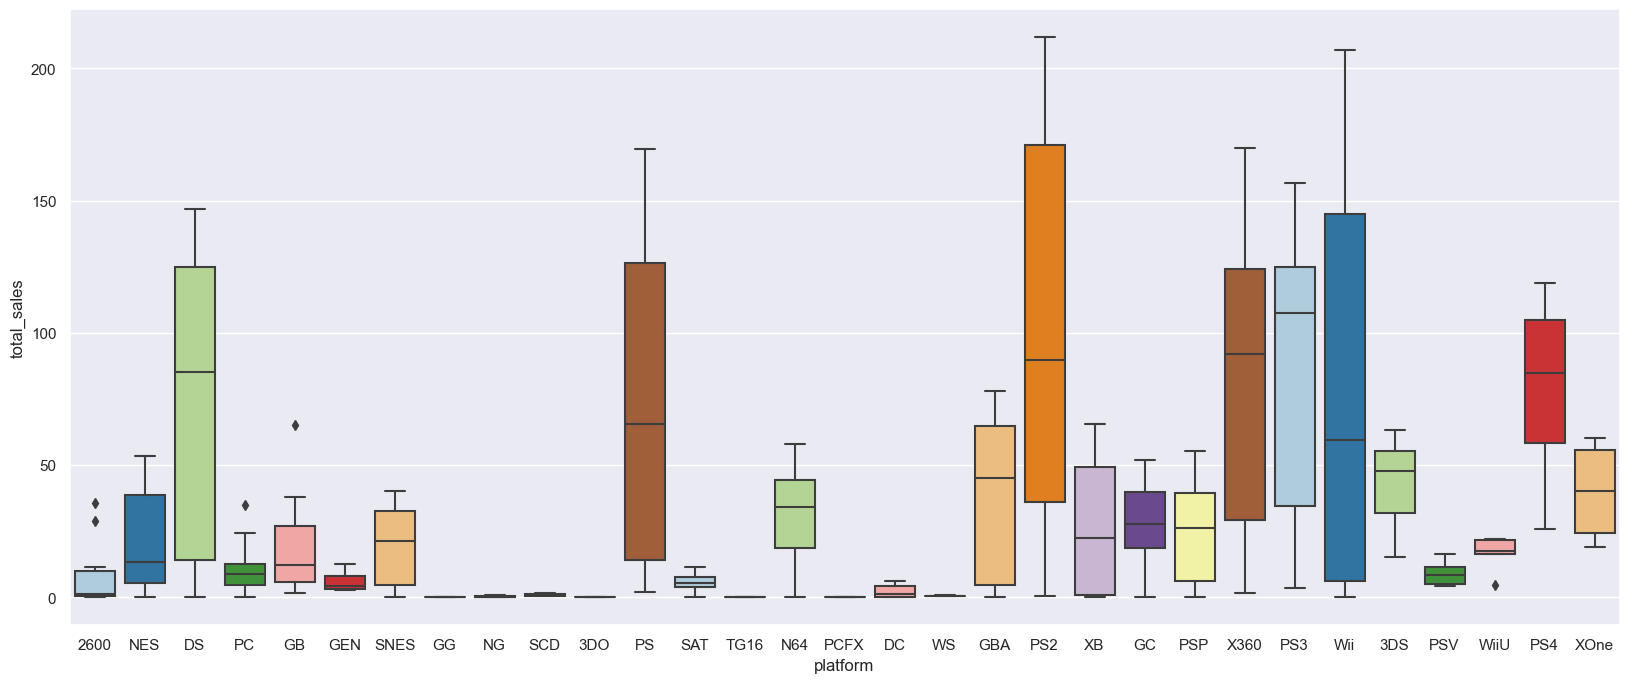

In [50]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df_year_platform_sales, x='platform', y='total_sales', palette='Paired')
plt.show()

* Observations:
* When looking at the global sales per platform, Sony Playstation consoles are the most sellable platforms followed by Nintendo's Wii and DS, and Microsoft's XBox consoles. There are significant differences in the platforms as seen by the average sales (median line). Some platforms are dispersed wider than others. Some are less dispersed.    

## Features Engineering

### Effect of Reviews to Platform

In [51]:
df_good['critic_score'] = round(df_good['critic_score']/10)

In [52]:
df_good['user_score'] = round(df_good['user_score'])

In [53]:
df_score = df_good.groupby(['platform']).agg({'critic_score': "mean", "user_score":"mean"}).reset_index()

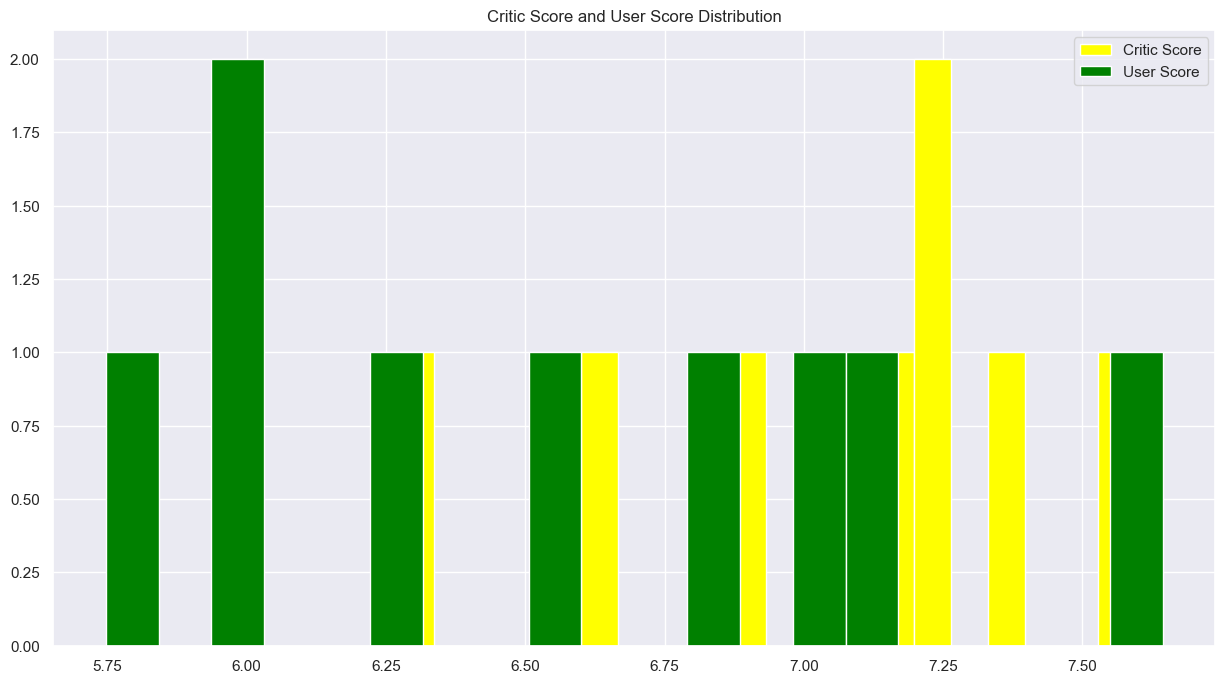

In [54]:
df_score.critic_score.hist(bins=20, figsize=(15,8), color='yellow')
df_score.user_score.hist(bins=20, figsize=(15,8), color='green')
plt.title('Critic Score and User Score Distribution')
plt.legend(['Critic Score', 'User Score'])
plt.show()

* Observations:
* Based on the plot above, the critic score and user score are far off from each other and seem to be widely distributed and not be unison in their results. It shows then, that the scoring from critics and scoring from users are independent from each other.

### Effect of Ratings to Sales 

### PS2 Sales and Ratings

In [55]:
df_ps2_score = df.query('platform == "PS2"').fillna(0)

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

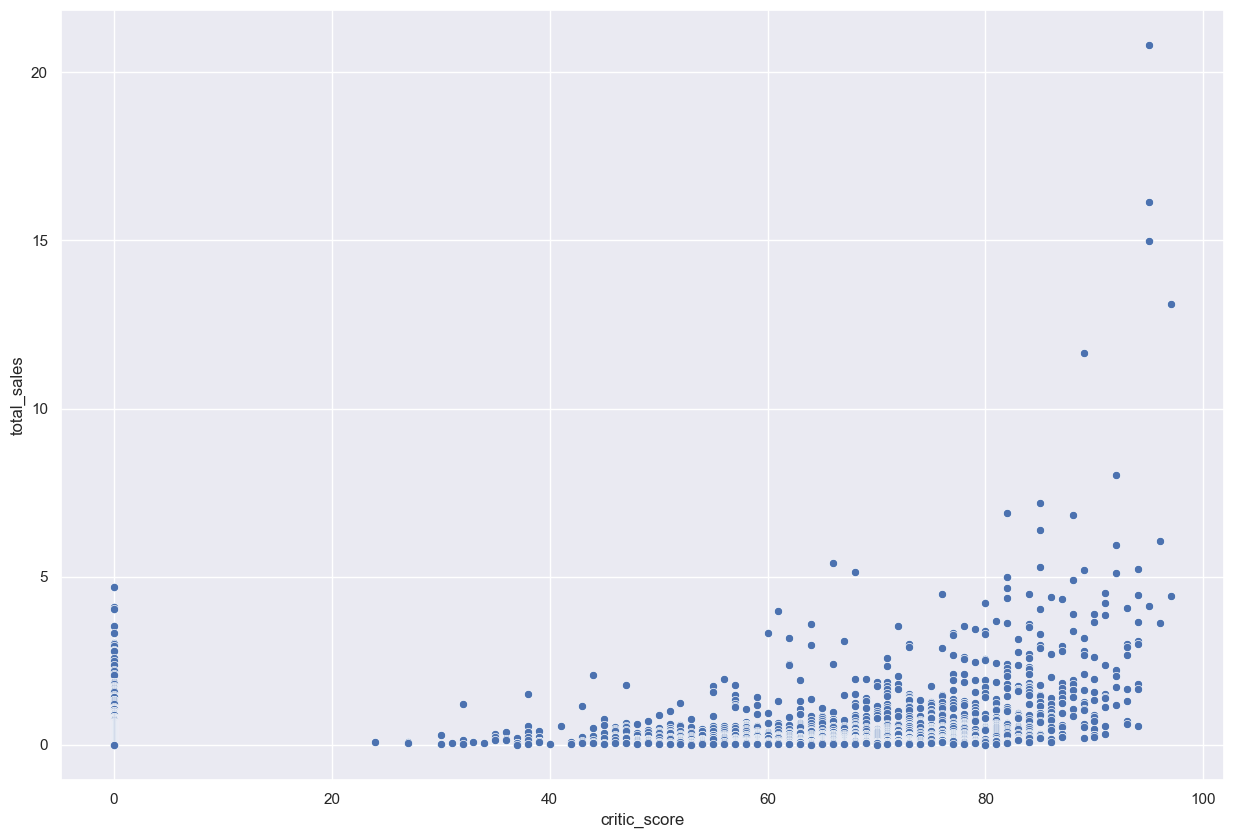

In [56]:
sns.scatterplot(data=df_ps2_score, x='critic_score', y='total_sales')

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

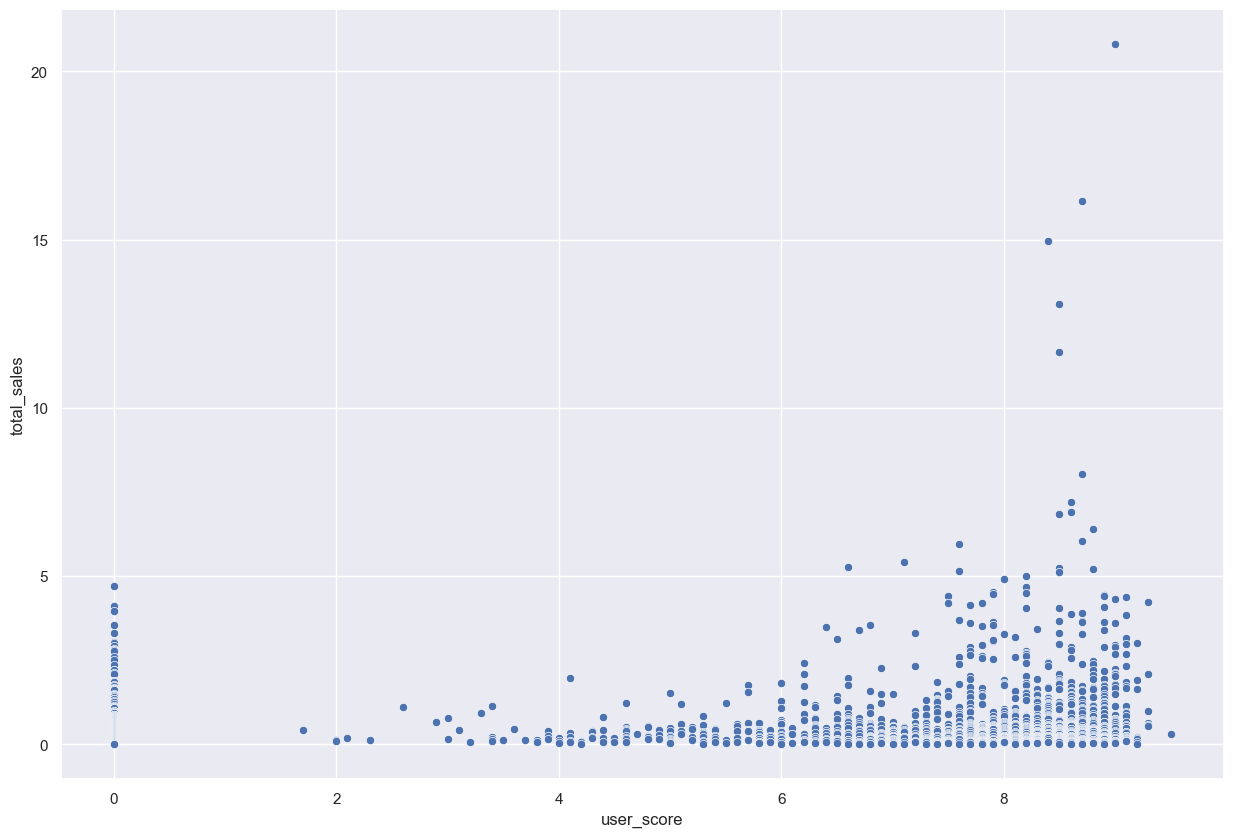

In [57]:
sns.scatterplot(data=df_ps2_score, x='user_score', y='total_sales')

In [58]:
from scipy.stats import pearsonr
data1 = (df_ps2_score['user_score'] + df_ps2_score['critic_score']) / 2
data2 = df_ps2_score['total_sales']
corr, _ = pearsonr(data1, data2)
print('Pearsons Correlation: %.3f' % corr)

Pearsons Correlation: 0.302


* Observation:
* PS2 has the highest sales and with the correlation to critics and user scores, there is moderate yet positive correlation with 0.228. This means that the reviews affected the sales of PS2.

### Correlation of Total Sales to Scoring

In [59]:
df_sales_score = df.groupby(['platform']).agg({'critic_score':'mean', 'user_score':'mean', 'total_sales':'sum'}).reset_index()

In [60]:
df_sales_score ['total_score'] = ((df_sales_score['critic_score'] + df_sales_score['user_score']) /2 ) 

In [61]:
df_sales_score_new = df_sales_score.drop(columns =['critic_score', 'user_score'])

<Figure size 2000x800 with 0 Axes>

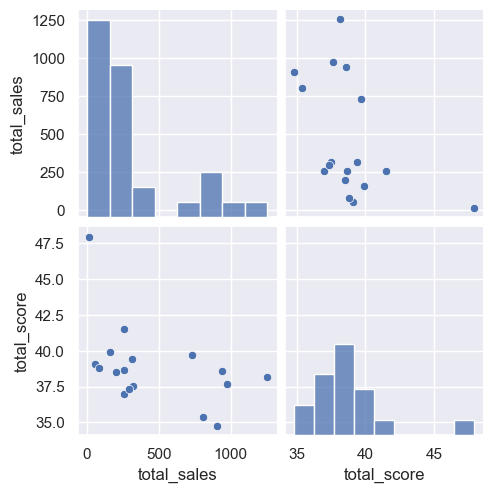

In [62]:
plt.figure(figsize=(20,8))
sns.pairplot(df_sales_score_new)
plt.show()

* Observations:
* Based on the scatterplot between reviews and sales, there is no correlation to sales and scoring. This means that one does not affect the other. Whether the scoring is high or low, sales are not affected.

### Effect of Genre and Sales

In [63]:
df_genre_sales = df.groupby(['genre']).agg({'total_sales':'sum'}).reset_index()
df_genre_sales.columns = ['genre', 'total_sales']

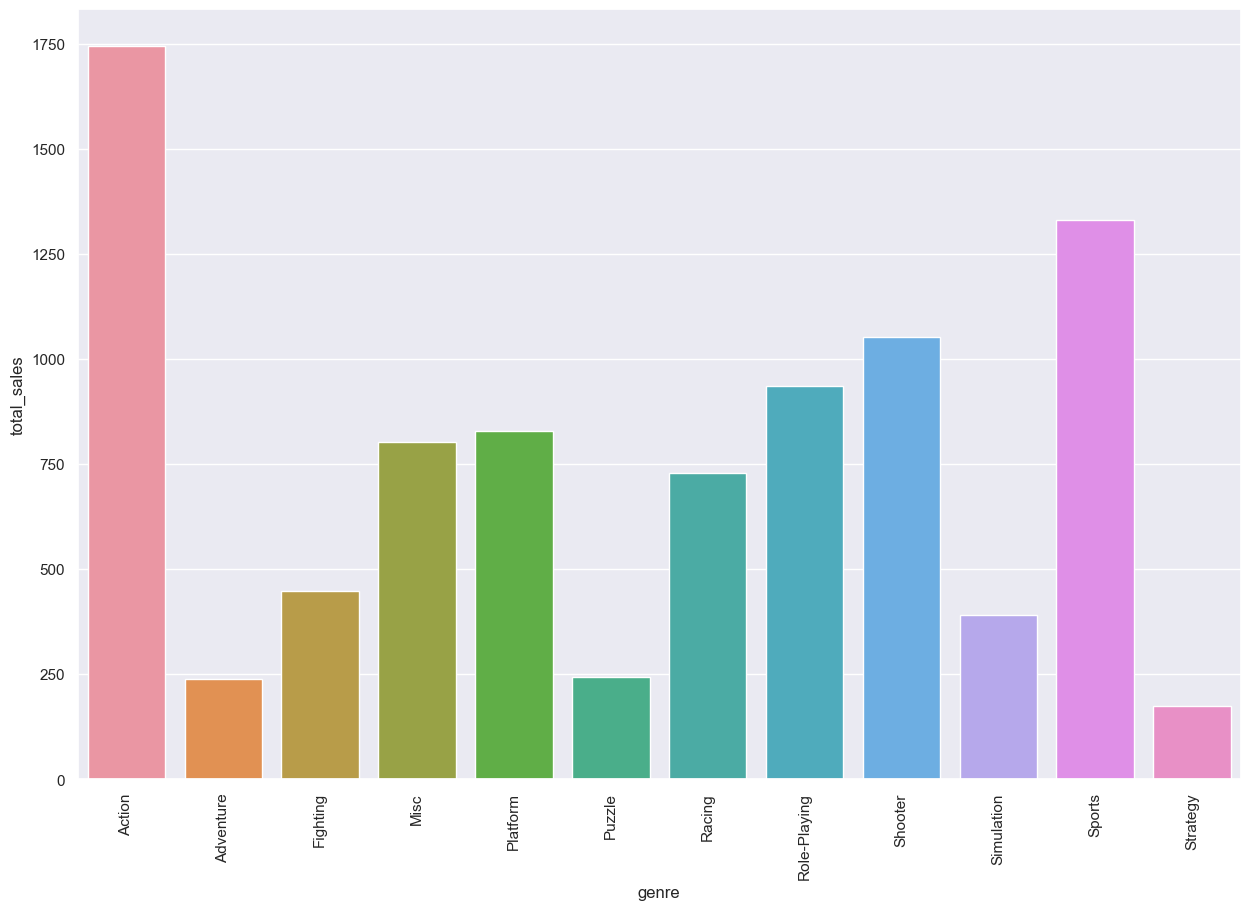

In [64]:
sns.barplot(data=df_genre_sales, x='genre', y='total_sales')
plt.xticks(rotation=90)
plt.show()

* Observation:
* Based on the barplot, the most profitable genre are Action games followed by Sports and Shooter games. 

### Effect of Platform and Sales

In [65]:
df_platform_sales = df.groupby(['platform']).agg({'total_sales':'sum'}).reset_index()
df_platform_sales.columns = ['platform', 'total_sales']

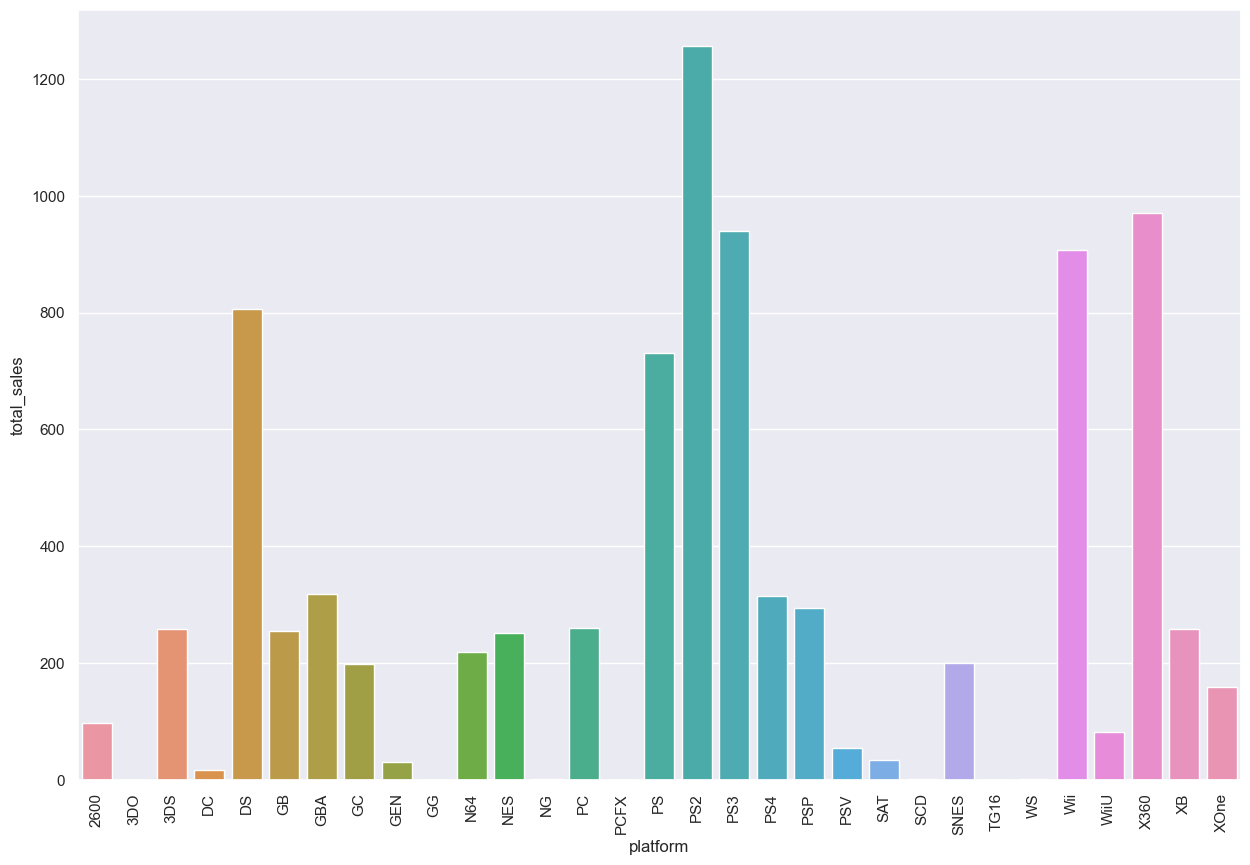

In [66]:
sns.barplot(data=df_platform_sales, x='platform', y='total_sales')
plt.xticks(rotation=90)
plt.show()

* Observations:
* The plot above shows the total sales volume per platform. PS2 has the highest sales volume followe dby X360 and Wii.

### User Profiles Per Region

#### Global Sales Per Region Per Platform

In [67]:
df_platform_global_sales = df_good.groupby(['platform']).agg({'NA':'sum', 'EU':'sum', 'JP':'sum'})

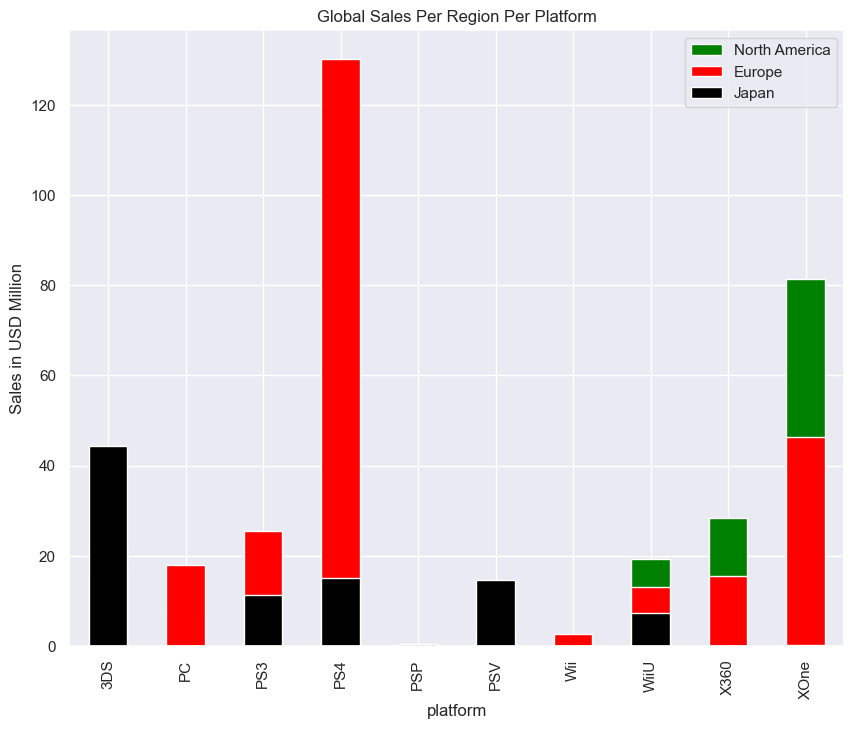

In [68]:
plt.figure(figsize=(10, 8))
df_platform_global_sales.NA.plot(kind='bar', color='green')
df_platform_global_sales.EU.plot(kind='bar', color='red')
df_platform_global_sales.JP.plot(kind='bar', color='black')
plt.title('Global Sales Per Region Per Platform')
plt.ylabel('Sales in USD Million')
plt.legend(['North America', 'Europe', 'Japan'])
plt.show()

* Observations:
* The top five platforms for NA are PS2, X360, Wii, PS3, and DS. North America catered to gaming platfroms from 2 Japan-based companies, Sony (PS) and Nintendo (Wii and DS) and 1 from US company, Microsoft (X360). 
* The top five platforms for EU are PS2, PS3, X360, Wii, and PS. Europe like North America catered to gaming platforms from Sony, Nintendo and Microsoft. 
* The top five platforms for JP are DS, PS2, PS3, PS, and SNES. Japan supports its own companies Sony and Nintendo.  

### Genres Per Region

In [69]:
df_genre_global_sales = df_good.groupby(['genre']).agg({'NA':'sum', 'EU':'sum', 'JP':'sum'})

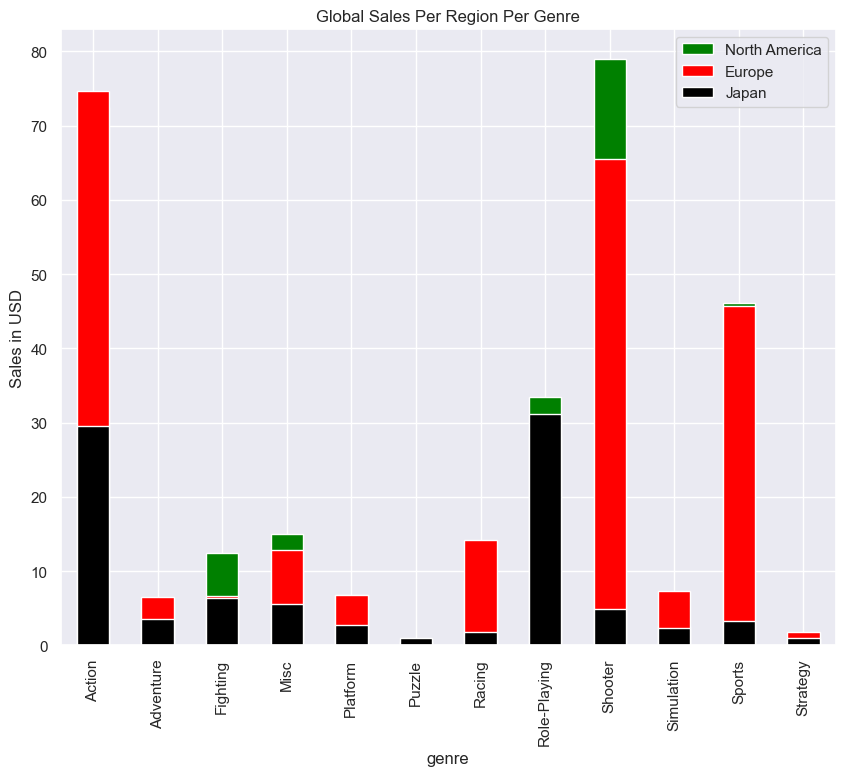

In [70]:
plt.figure(figsize=(10, 8))
df_genre_global_sales.NA.plot(kind='bar', color='green')
df_genre_global_sales.EU.plot(kind='bar', color='red')
df_genre_global_sales.JP.plot(kind='bar', color='black')
plt.title('Global Sales Per Region Per Genre')
plt.ylabel('Sales in USD')
plt.legend(['North America', 'Europe', 'Japan'])
plt.show()

* Observations:
* The top 5 genres in NA are Action, Sports, Shooter, Platform, and Misc. The gamers in NA are more fast-paced in gaming. 
* The top 5 genres in EU are Action, Sports, Shooter, Racing, and Misc.The gamers in EU are similar in taste in gaming with NA. 
* The top 5 genres in Japan are Role Playing, Action, Sports, Platform, and Misc. The gamers in JP are more into role-playing games since most of it are versions of their favorite animation series, anime.  

### Rating and Global Average Sales

In [71]:
df_rating_sales = df_good.groupby(['rating']).agg({'NA':'mean', 'EU':'mean', 'JP':'mean'})

<AxesSubplot:ylabel='rating'>

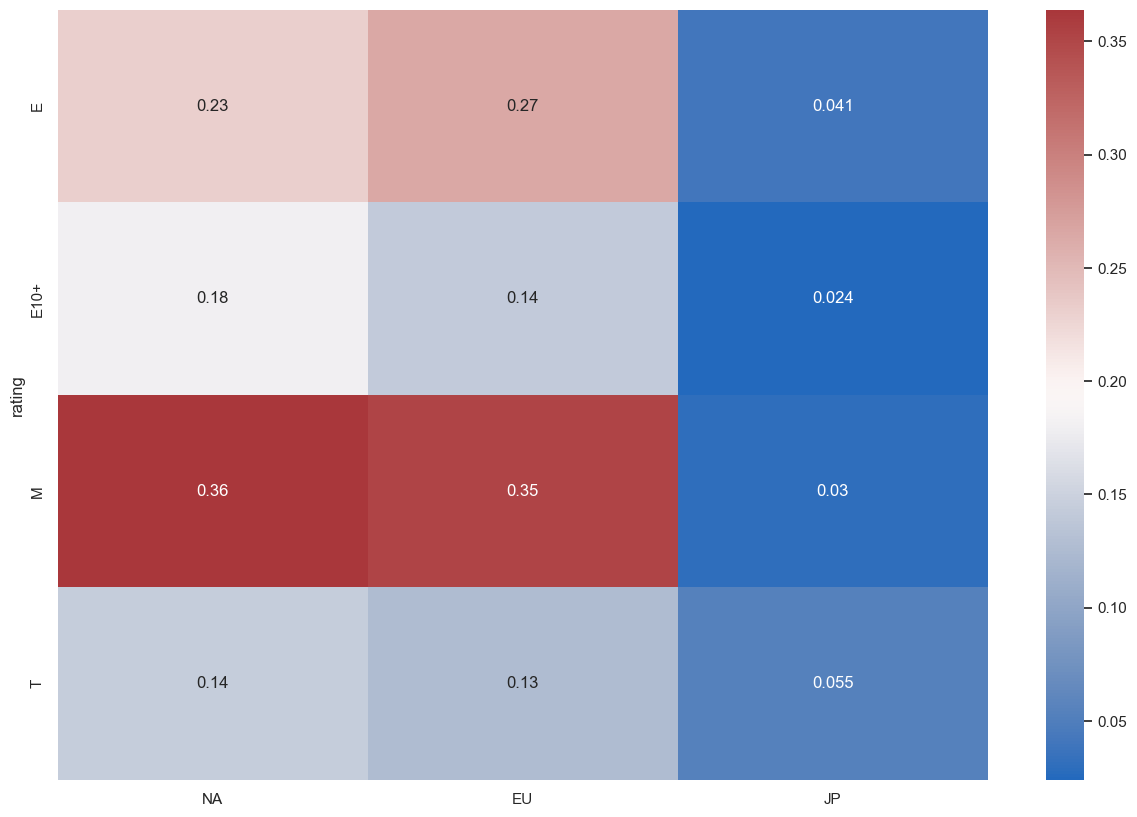

In [72]:
sns.heatmap(df_rating_sales, annot=True, cmap='vlag')

* Observation:
* Mature (M) games have affected sales in NA followed by E (Everyone) and T (Teens) games. It's the same in EU. In Japan, ratings have not affected the sales. 

## Hypothesis Testing

In [73]:
import scikit_posthocs as sp
pd.options.display.float_format = '{:,.4f}'.format

In [74]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")       

In [75]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

### Hypothesis 1: Average user ratings of the Xbox One and PC platforms are the same.

<p>H0: The data is normally distributed.</p>
H1: The data is not normally distributed.
<br></br>Assume that alpha=0.05 If p-value is >0.05, it can be said that data is normally distributed.

In [76]:
alpha = 0.05

test1 = df_good.query('platform == "XOne" & user_score.notna()')['user_score']
test2 = df_good.query('platform == "PC"& user_score.notna()')['user_score']

check_normality(test1)
check_normality(test2)


p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed


<p>H0: The variances of the samples are same.</p>
H1: The variances of the samples are different.

In [77]:
check_variance_homogeneity(test1, test2)

p value:0.0162
Reject null hypothesis >> The variances of the samples are different.


In [78]:
results = stats.ttest_ind(test1,test2, equal_var = False)
print("p-value: ", results.pvalue)

if results.pvalue < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis") 

p-value:  0.1432204523019565
Fail to reject null hypothesis


* Conclusion:
* The p-value tells us that there's no significant difference in the average user ratings of the Xbox One and PC platforms. This means that user ratings for XBox One and PC platforms are the same. Microsoft makes XBox One and PCs. It could be that users on both platforms are one and the same, so their ratings on either platform are similar.  

* Conclusion:
* We won't do a nonparametric posthoc test since it was found out that there is no difference. 

### Hypothesis 2: Average user ratings for the Action and Sports genres are different

<p>H0: The data is normally distributed.</p>
H1: The data is not normally distributed.
<br></br>Assume that alpha=0.05 If p-value is >0.05, it can be said that data is normally distributed.

In [79]:
test3 = df_good.query('genre == "Action" & user_score.notna()')['user_score']
test4 = df_good.query('genre == "Sports"& user_score.notna()')['user_score']

check_normality(test1)
check_normality(test2)

p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed


In [80]:
check_variance_homogeneity(test3, test4)

p value:0.0000
Reject null hypothesis >> The variances of the samples are different.


<p>H0: The variances of the samples are same.</p>
H1: The variances of the samples are different.

In [81]:
results = stats.ttest_ind(test1,test2, equal_var = False)
print("p-value: ", results.pvalue)

if results.pvalue < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis") 

p-value:  0.1432204523019565
Fail to reject null hypothesis


* Conclusion:
* At the significance level, there is no significant difference between the user ratings of Action and Sports games. This means that ratings for Action games from users are also the same with the ratings for Sports games. It could be that users from Action games are also into Sports games.   

* Conclusion:
* We won't do a nonparametric posthoc test since it was found out that there is no difference. 

## Overall Conclusion

We conducted a data analysis on a video games data from the online store Ice. It contains user and expert reviews, genres, platforms and historical data on game sales from open sources. The tasks are to identify patterns to determine best selling games and what platforms mostly used for. The resulting data will help in coming up with advertising campaigns. 

We first examined the distribution of the game titles released from 1980 to 2016. Most titles were released starting from 2004 with about 1,600 titles released in 2011. In comparison to the 80s and 90s, there were roughly 1,000 game titles released in two decades. Next was the distribution of sales of game titles sold to various platforms or gaming device. It shows PS2 having the highest number of game titles of 1,200 followed by PS3 with roughly 1,000 game titles. We can also deduce that the most dominant platforms are PS or Play Stations, Wii and X360. Japan-based companies Sony and Nintendo manufactures PS and Wii respectively. US-based company Microsoft makes X360. 

We also studied the sales growth of the platforms with the top sales of game titles. Game titles for PS2 achieved a high sales growth in 5 years but slowly declined for the next 5 years. PS3 came afterwards in 2005 and for 10 years, game titles for PS3 achieved a considerable quick rise of sales but not as high as its predecessor, PS2. Game titles for Nintendo's Wii achieved a quick and short sales in 5 years but declined afterwards. Another platform from Nintendo, DS, is the oldest of the top 5 being launched as far as 1985. However, in almost 30 year, the DS platform achieved a sustaining power with an upsurge of sales in 2005 up to 2010. Microsoft's Xbox came in late as one of the top platforms in 2005 when Playstation and Wii is already dominating the market. But game titles for X360 achieved sales growth in 10 years reaching to about USD 150 million in 2011 alone.   

Looking into the sale of game titles for Playstation platforms, PS, PS2, PS3 and PS4, only PS2 showed considerable growth reaching to USD 200 million sales in 2004 alone. Its predecessor, PS, only reached about USD 170 million sales of game titles but slowly declined. PS4 being the newly released version of PlayStation started with high sales compared to the launches of the previous version. It only shows Sony is updating its platforms to keep up with the demand and technology to be the dominating platform in the market. As to global sales of game titles per platform, Sony's Playstation is on top followed by Nintendo's Wii and DS and Microsoft's XBox consoles. 

As to effect of the critic and user scores to the platform, most of the scores are 7 or nearly favorable response. As to PS2 as the highest sales of game titles for the platform, there is a moderate yet positive correlation with 0.331. This means that the reviews affected partly to the sales of game titles for PS2. 

However, looking into the correlation of game sales and critics and user scores, there is no correlation. This means that buyers of games don't pay attention to the critics or even themselves in purchasing games. 

As to the distribution of sales per region in North America (NA), Europe (EU), and Japan (JP), we can conclude that platforms from other countries (PS and Wii) are patronized in NA and EU. Nintendo's Wii and DS is more patronized in Japan being a Japanese product. As to the nature of games played per region, NA and EY are more into fast-paced Action games and Sports. Japan are more into role-playing games. Role-playing games are mostly anime-based which originated in Japan. 

As to ESRB ratings and its impact to sales, Mature (AO) games have affected sales in NA. Similarly it is the same case for EU. The rating seems to be not affected the sales of games. 

We conducted a statistical test to check if the average user ratings of XBox One and PC platforms are the same. The results indicated that the p-value was higher than the critical statistical significance level. Therefore, we accept the null hypothesis. This means that user ratings for Xbox One and PC are the same. The reason could be that users for Xbox One and PC are loyal to the makers to the platform, Microsoft. These users patronized games for both platforms. 

Another hypothesis we tested is whether the average user ratings of Actions and Sports games are different. The result showed that the p-value was higher than the critical significance level. Therefore, we accept the null hypothesis. We can say that the user ratings of Action and Sports games are the same. This means that as far as users are concerned, any Action game user is also a Sports games user.  